# **INITIALIZE ENVIRONMENT**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# install dependencies
!pip install torch torchvision captum SoccerNet timm

In [ ]:
# clone the repository
!git clone https://github.com/SoccerNet/sn-spotting.git

fatal: destination path 'sn-spotting' already exists and is not an empty directory.


# **DOWNLOAD DATA**

In [ ]:
# ~ 1.3TB DATA
# from SoccerNet.Downloader import SoccerNetDownloader

# mySoccerNetDownloader = SoccerNetDownloader(LocalDirectory="drive/MyDrive/files/soccernet")
# mySoccerNetDownloader.password = input("Password for videos?:\n") # "s0cc3rn3t"
# mySoccerNetDownloader.downloadGames(
#     files=[
#         "1_224p.mkv", "2_224p.mkv",
#         "1_720p.mkv", "2_720p.mkv",
#         "Labels-v2.json", "Labels-cameras.json"
#     ],
#     split=["train", "valid", "test", "challenge"]
# )

Password for videos?:
s0cc3rn3t
drive/MyDrive/files/soccernet/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley/1_224p.mkv already exists
drive/MyDrive/files/soccernet/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley/2_224p.mkv already exists
drive/MyDrive/files/soccernet/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley/1_720p.mkv already exists
drive/MyDrive/files/soccernet/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley/2_720p.mkv already exists
drive/MyDrive/files/soccernet/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley/Labels-v2.json already exists
drive/MyDrive/files/soccernet/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley/Labels-cameras.json already exists
drive/MyDrive/files/soccernet/england_epl/2014-2015/2015-02-21 - 18-00 Crystal Palace 1 - 2 Arsenal/1_224p.mkv already exists
drive/MyDrive/files/soccernet/england_epl/2014-2015/2015-02-21 - 18-00 Crystal Palace 1 - 2 Arsenal/2_224p.mkv alre

KeyboardInterrupt: 

# **TRAINING AND EVALUATION**

In [ ]:
%pwd

'/content'

In [ ]:
# load the model checkpoint from google drive
!mkdir -p models/CALF_v2/

!cp drive/MyDrive/files/soccernet/model.pth.tar models/CALF_v2/

In [ ]:
# train and evaluate benchmark with resnet features
!python sn-spotting/Benchmarks/CALF/src/main.py \
    --SoccerNet_path=/drive/MyDrive/files/soccernet \
    --features=ResNET_TF2_PCA512.npy \
    --num_features=512 \
    --model_name=CALF_v2 \
    --batch_size 32 \
    --evaluation_frequency 20 \
    --chunks_per_epoch 18000

2024-11-22 04:20:13,030 [MainThread  ] [INFO ]  Starting main function
2024-11-22 04:20:13,030 [MainThread  ] [INFO ]  Parameters:
2024-11-22 04:20:13,030 [MainThread  ] [INFO ]   SoccerNet_path : /drive/MyDrive/files/soccernet-2024
2024-11-22 04:20:13,030 [MainThread  ] [INFO ]         features : ResNET_TF2_PCA512.npy
2024-11-22 04:20:13,030 [MainThread  ] [INFO ]       max_epochs : 1000
2024-11-22 04:20:13,030 [MainThread  ] [INFO ]     load_weights : None
2024-11-22 04:20:13,030 [MainThread  ] [INFO ]       model_name : CALF_v2
2024-11-22 04:20:13,030 [MainThread  ] [INFO ]        test_only : False
2024-11-22 04:20:13,030 [MainThread  ] [INFO ]        challenge : False
2024-11-22 04:20:13,030 [MainThread  ] [INFO ]         K_params : None
2024-11-22 04:20:13,030 [MainThread  ] [INFO ]     num_features : 512
2024-11-22 04:20:13,030 [MainThread  ] [INFO ]  chunks_per_epoch : 18000
2024-11-22 04:20:13,031 [MainThread  ] [INFO ]  evaluation_frequency : 20
2024-11-22 04:20:13,031 [MainTh

In [ ]:
# save the model checkpoint to google drive
!cp models/CALF_v2/model.pth.tar drive/MyDrive/files/soccernet/

# **VISUALIZATION**

In [ ]:
# classes.py

import torch


# Event name to label index fororor SoccerNet-V2
EVENT_DICTIONARY_V2 = {"Penalty":0,"Kick-off":1,"Goal":2,"Substitution":3,"Offside":4,"Shots on target":5,
                                "Shots off target":6,"Clearance":7,"Ball out of play":8,"Throw-in":9,"Foul":10,
                                "Indirect free-kick":11,"Direct free-kick":12,"Corner":13,"Yellow card":14
                                ,"Red card":15,"Yellow->red card":16}

INVERSE_EVENT_DICTIONARY_V2 = {0:"Penalty",1:"Kick-off",2:"Goal",3:"Substitution",4:"Offside",5:"Shots on target",
                                6:"Shots off target",7:"Clearance",8:"Ball out of play",9:"Throw-in",10:"Foul",
                                11:"Indirect free-kick",12:"Direct free-kick",13:"Corner",14:"Yellow card"
                                ,15:"Red card",16:"Yellow->red card"}

# Values of the K parameters (in seconds) in the context-aware loss
K_V2 = torch.FloatTensor([[-100, -98, -20, -40, -96, -5, -8, -93, -99, -31, -75, -10, -97, -75, -20, -84, -18], [-50, -49, -10, -20, -48, -3, -4, -46, -50, -15, -37, -
                                                                                                                 5, -49, -38, -10, -42, -9], [50, 49, 60, 10, 48, 3, 4, 46, 50, 15, 37, 5, 49, 38, 10, 42, 9], [100, 98, 90, 20, 96, 5, 8, 93, 99, 31, 75, 10, 97, 75, 20, 84, 18]]).cuda()


In [ ]:
# preprocessing.py


import numpy as np
import torch

def rulesToCombineShifts(shift_from_last_event, shift_until_next_event, params):

    s1  = shift_from_last_event
    s2  = shift_until_next_event
    K = params

    if s1 < K[2]:
        value = s1
    elif s1 < K[3]:
        if s2 <= K[0]:
            value = s1
        else:
            if (s1-K[2])/(K[3]-K[2]) < (K[1]-s2)/(K[1]-K[0]):
                value = s1
            else:
                value = s2
    else:
        value = s2

    return value

def oneHotToShifts(onehot, params):


    nb_frames = onehot.shape[0]
    nb_actions = onehot.shape[1]

    Shifts = np.empty(onehot.shape)

    for i in range(nb_actions):

        x = onehot[:,i]
        K = params[:,i]
        shifts = np.empty(nb_frames)

        loc_events = np.where(x == 1)[0]
        nb_events = len(loc_events)

        if nb_events == 0:
            shifts = np.full(nb_frames, K[0])
        elif nb_events == 1:
            shifts = np.arange(nb_frames) - loc_events
        else:
            loc_events = np.concatenate(([-K[3]],loc_events,[nb_frames-K[0]]))
            for j in range(nb_frames):
                shift_from_last_event = j - loc_events[np.where(j >= loc_events)[0][-1]]
                shift_until_next_event = j - loc_events[np.where(j < loc_events)[0][0]]
                shifts[j] = rulesToCombineShifts(shift_from_last_event, shift_until_next_event, K)

        Shifts[:,i] = shifts

    return Shifts

import random


def getNegativeIndexes(labels, params, chunk_size):

    zero_one_labels = np.zeros(labels.shape)
    for i in np.arange(labels.shape[1]):
        zero_one_labels[:,i] = 1-np.logical_or(np.where(labels[:,i] >= params[3,i], 1,0),np.where(labels[:,i] <= params[0,i], 1,0))
    zero_one = np.where(np.sum(zero_one_labels, axis=1)>0, 0, 1)

    zero_one_pad = np.append(np.append([1-zero_one[0],], zero_one, axis=0), [1-zero_one[-1]], axis=0)
    zero_one_pad_shift = np.append(zero_one_pad[1:], zero_one_pad[-1])

    zero_one_sub = zero_one_pad - zero_one_pad_shift

    zero_to_one_index = np.where(zero_one_sub == -1)[0]
    one_to_zero_index = np.where(zero_one_sub == 1)[0]


    if zero_to_one_index[0] > one_to_zero_index[0]:
        one_to_zero_index = one_to_zero_index[1:]
    if zero_to_one_index.shape[0] > one_to_zero_index.shape[0]:
        zero_to_one_index = zero_to_one_index[:-1]

    list_indexes = list()

    for i,j in zip(zero_to_one_index, one_to_zero_index):
        if j-i >= chunk_size:
            list_indexes.append([i,j])

    return list_indexes


def getChunks_anchors(labels, game_index, params, chunk_size=240, receptive_field=80):

    # get indexes of labels
    indexes=list()
    for i in np.arange(labels.shape[1]):
        indexes.append(np.where(labels[:,i] == 0)[0].tolist())

    # Positive chunks
    anchors = list()

    class_counter = 0
    for event in indexes:
        for element in event:
            anchors.append([game_index,element,class_counter])
        class_counter += 1


    # Negative chunks

    negative_indexes = getNegativeIndexes(labels, params, chunk_size)

    for negative_index in negative_indexes:
        start = [negative_index[0], negative_index[1]]
        anchors.append([game_index,start,labels.shape[1]])


    return anchors

def getTimestampTargets(labels, num_detections):

    targets = np.zeros((labels.shape[0],num_detections,2+labels.shape[-1]), dtype='float')

    for i in np.arange(labels.shape[0]):

        time_indexes, class_values = np.where(labels[i]==0)

        counter = 0

        for time_index, class_value in zip(time_indexes, class_values):

            # Confidence
            targets[i,counter,0] = 1.0
            # frame index normalized
            targets[i,counter,1] = time_index/(labels.shape[1])
            # The class one hot encoded
            targets[i,counter,2+class_value] = 1.0
            counter += 1

            if counter >= num_detections:
                print("More timestamp than what was fixed... A lot happened in that chunk")
                break

    return targets



# Function to transform the timestamps to vectors
def timestamps2long(output_spotting, video_size, chunk_size, receptive_field):

    start = 0
    last = False
    receptive_field = receptive_field//2

    timestamps_long = torch.zeros([video_size,output_spotting.size()[-1]-2], dtype = torch.float, device=output_spotting.device)-1


    for batch in np.arange(output_spotting.size()[0]):

        tmp_timestamps = torch.zeros([chunk_size,output_spotting.size()[-1]-2], dtype = torch.float, device=output_spotting.device)-1

        for i in np.arange(output_spotting.size()[1]):
            tmp_timestamps[torch.floor(output_spotting[batch,i,1]*(chunk_size-1)).type(torch.int) , torch.argmax(output_spotting[batch,i,2:]).type(torch.int) ] = output_spotting[batch,i,0]

        # ------------------------------------------
        # Store the result of the chunk in the video
        # ------------------------------------------

        # For the first chunk
        if start == 0:
            timestamps_long[0:chunk_size-receptive_field] = tmp_timestamps[0:chunk_size-receptive_field]

        # For the last chunk
        elif last:
            timestamps_long[start+receptive_field:start+chunk_size] = tmp_timestamps[receptive_field:]
            break

        # For every other chunk
        else:
            timestamps_long[start+receptive_field:start+chunk_size-receptive_field] = tmp_timestamps[receptive_field:chunk_size-receptive_field]

        # ---------------
        # Loop Management
        # ---------------

        # Update the index
        start += chunk_size - 2 * receptive_field
        # Check if we are at the last index of the game
        if start + chunk_size >= video_size:
            start = video_size - chunk_size
            last = True
    return timestamps_long

# Function to transform the batches to vectors
def batch2long(output_segmentation, video_size, chunk_size, receptive_field):

    start = 0
    last = False
    receptive_field = receptive_field//2

    segmentation_long = torch.zeros([video_size,output_segmentation.size()[-1]], dtype = torch.float, device=output_segmentation.device)


    for batch in np.arange(output_segmentation.size()[0]):

        tmp_segmentation = torch.nn.functional.one_hot(torch.argmax(output_segmentation[batch], dim=-1), num_classes=output_segmentation.size()[-1])


        # ------------------------------------------
        # Store the result of the chunk in the video
        # ------------------------------------------

        # For the first chunk
        if start == 0:
            segmentation_long[0:chunk_size-receptive_field] = tmp_segmentation[0:chunk_size-receptive_field]

        # For the last chunk
        elif last:
            segmentation_long[start+receptive_field:start+chunk_size] = tmp_segmentation[receptive_field:]
            break

        # For every other chunk
        else:
            segmentation_long[start+receptive_field:start+chunk_size-receptive_field] = tmp_segmentation[receptive_field:chunk_size-receptive_field]

        # ---------------
        # Loop Management
        # ---------------

        # Update the index
        start += chunk_size - 2 * receptive_field
        # Check if we are at the last index of the game
        if start + chunk_size >= video_size:
            start = video_size - chunk_size
            last = True
    return segmentation_long

In [ ]:
# dataset.py

from torch.utils.data import Dataset

import numpy as np
import random
# import pandas as pd
import os
import time


from tqdm import tqdm
# import utils

import torch

import logging
import json

from SoccerNet.Downloader import getListGames
from SoccerNet.Downloader import SoccerNetDownloader
from config.classes import EVENT_DICTIONARY_V2, K_V2

from preprocessing import oneHotToShifts, getTimestampTargets, getChunks_anchors



class SoccerNetClips(Dataset):
    def __init__(self, path, features="ResNET_PCA512.npy", split="train",
                framerate=2, chunk_size=240, receptive_field=80, chunks_per_epoch=6000):
        self.path = path
        self.listGames = getListGames(split)
        self.features = features
        self.chunk_size = chunk_size
        self.receptive_field = receptive_field
        self.chunks_per_epoch = chunks_per_epoch

        self.dict_event = EVENT_DICTIONARY_V2
        self.num_classes = 17
        self.labels="Labels-v2.json"
        self.K_parameters = K_V2*framerate
        self.num_detections =15
        self.split=split

        logging.info("Checking/Download features and labels locally")
        downloader = SoccerNetDownloader(path)
        downloader.downloadGames(files=[self.labels, f"1_{self.features}", f"2_{self.features}"], split=[split], verbose=False)


        logging.info("Pre-compute clips")

        clip_feats = []
        clip_labels = []

        self.game_feats = list()
        self.game_labels = list()
        self.game_anchors = list()
        for i in np.arange(self.num_classes+1):
            self.game_anchors.append(list())

        game_counter = 0
        for game in tqdm(self.listGames):
            # Load features
            feat_half1 = np.load(os.path.join(self.path, game, "1_" + self.features))
            feat_half2 = np.load(os.path.join(self.path, game, "2_" + self.features))

            # Load labels
            labels = json.load(open(os.path.join(self.path, game, self.labels)))

            label_half1 = np.zeros((feat_half1.shape[0], self.num_classes))
            label_half2 = np.zeros((feat_half2.shape[0], self.num_classes))


            for annotation in labels["annotations"]:

                time = annotation["gameTime"]
                event = annotation["label"]

                half = int(time[0])

                minutes = int(time[-5:-3])
                seconds = int(time[-2::])
                frame = framerate * ( seconds + 60 * minutes )

                if event not in self.dict_event:
                    continue
                label = self.dict_event[event]



                if half == 1:
                    frame = min(frame, feat_half1.shape[0]-1)
                    label_half1[frame][label] = 1

                if half == 2:
                    frame = min(frame, feat_half2.shape[0]-1)
                    label_half2[frame][label] = 1

            shift_half1 = oneHotToShifts(label_half1, self.K_parameters.cpu().numpy())
            shift_half2 = oneHotToShifts(label_half2, self.K_parameters.cpu().numpy())

            anchors_half1 = getChunks_anchors(shift_half1, game_counter, self.K_parameters.cpu().numpy(), self.chunk_size, self.receptive_field)

            game_counter = game_counter+1

            anchors_half2 = getChunks_anchors(shift_half2, game_counter, self.K_parameters.cpu().numpy(), self.chunk_size, self.receptive_field)

            game_counter = game_counter+1



            self.game_feats.append(feat_half1)
            self.game_feats.append(feat_half2)
            self.game_labels.append(shift_half1)
            self.game_labels.append(shift_half2)
            for anchor in anchors_half1:
                self.game_anchors[anchor[2]].append(anchor)
            for anchor in anchors_half2:
                self.game_anchors[anchor[2]].append(anchor)



    def __getitem__(self, index):

        # Retrieve the game index and the anchor
        class_selection = random.randint(0, self.num_classes)
        event_selection = random.randint(0, len(self.game_anchors[class_selection])-1)
        game_index = self.game_anchors[class_selection][event_selection][0]
        anchor = self.game_anchors[class_selection][event_selection][1]

        # Compute the shift for event chunks
        if class_selection < self.num_classes:
            shift = np.random.randint(-self.chunk_size+self.receptive_field, -self.receptive_field)
            start = anchor + shift
        # Compute the shift for non-event chunks
        else:
            start = random.randint(anchor[0], anchor[1]-self.chunk_size)
        if start < 0:
            start = 0
        if start+self.chunk_size >= self.game_feats[game_index].shape[0]:
            start = self.game_feats[game_index].shape[0]-self.chunk_size-1

        # Extract the clips
        clip_feat = self.game_feats[game_index][start:start+self.chunk_size]
        clip_labels = self.game_labels[game_index][start:start+self.chunk_size]

        # Put loss to zero outside receptive field
        clip_labels[0:int(np.ceil(self.receptive_field/2)),:] = -1
        clip_labels[-int(np.ceil(self.receptive_field/2)):,:] = -1

        # Get the spotting target
        clip_targets = getTimestampTargets(np.array([clip_labels]), self.num_detections)[0]


        return torch.from_numpy(clip_feat), torch.from_numpy(clip_labels), torch.from_numpy(clip_targets)

    def __len__(self):
        return self.chunks_per_epoch


class SoccerNetClipsTesting(Dataset):
    def __init__(self, path, features="ResNET_PCA512.npy", split="test",
                framerate=2, chunk_size=240, receptive_field=80):
        self.path = path
        self.listGames = getListGames(split)
        self.features = features
        self.chunk_size = chunk_size
        self.receptive_field = receptive_field
        self.framerate = framerate

        self.dict_event = EVENT_DICTIONARY_V2
        self.num_classes = 17
        self.labels="Labels-v2.json"
        self.K_parameters = K_V2*framerate
        self.num_detections =15
        self.split=split

        logging.info("Checking/Download features and labels locally")
        downloader = SoccerNetDownloader(path)
        if split == "challenge":
            downloader.downloadGames(files=[f"1_{self.features}", f"2_{self.features}"], split=[split], verbose=False)
        else:
            downloader.downloadGames(files=[self.labels, f"1_{self.features}", f"2_{self.features}"], split=[split], verbose=False)



    def __getitem__(self, index):

        # Load features
        feat_half1 = np.load(os.path.join(self.path, self.listGames[index], "1_" + self.features))
        feat_half2 = np.load(os.path.join(self.path, self.listGames[index], "2_" + self.features))


        label_half1 = np.zeros((feat_half1.shape[0], self.num_classes))
        label_half2 = np.zeros((feat_half2.shape[0], self.num_classes))


        # Load labels
        if os.path.exists(os.path.join(self.path, self.listGames[index], self.labels)):
            labels = json.load(open(os.path.join(self.path, self.listGames[index], self.labels)))

            for annotation in labels["annotations"]:

                time = annotation["gameTime"]
                event = annotation["label"]

                half = int(time[0])

                minutes = int(time[-5:-3])
                seconds = int(time[-2::])
                frame = self.framerate * ( seconds + 60 * minutes )

                if event not in self.dict_event:
                    continue
                label = self.dict_event[event]

                value = 1
                if "visibility" in annotation.keys():
                    if annotation["visibility"] == "not shown":
                        value = -1

                if half == 1:
                    frame = min(frame, feat_half1.shape[0]-1)
                    label_half1[frame][label] = value

                if half == 2:
                    frame = min(frame, feat_half2.shape[0]-1)
                    label_half2[frame][label] = value

        def feats2clip(feats, stride, clip_length):

            idx = torch.arange(start=0, end=feats.shape[0]-1, step=stride)
            idxs = []
            for i in torch.arange(0, clip_length):
                idxs.append(idx+i)
            idx = torch.stack(idxs, dim=1)

            idx = idx.clamp(0, feats.shape[0]-1)
            idx[-1] = torch.arange(clip_length)+feats.shape[0]-clip_length

            return feats[idx,:]


        feat_half1 = feats2clip(torch.from_numpy(feat_half1),
                        stride=self.chunk_size-self.receptive_field,
                        clip_length=self.chunk_size)

        feat_half2 = feats2clip(torch.from_numpy(feat_half2),
                        stride=self.chunk_size-self.receptive_field,
                        clip_length=self.chunk_size)

        return feat_half1, feat_half2, torch.from_numpy(label_half1), torch.from_numpy(label_half2)

    def __len__(self):
        return len(self.listGames)

In [ ]:
# models.py

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import TransformerEncoder, TransformerEncoderLayer
import math

class SEBlock(nn.Module):
    def __init__(self, in_channels, reduction=4):
        super(SEBlock, self).__init__()
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)  # Global pooling over spatial/temporal dimensions
        self.fc1 = nn.Linear(in_channels, in_channels // reduction)
        self.fc2 = nn.Linear(in_channels // reduction, in_channels)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        batch, channels, _, _ = x.size()
        squeeze = self.global_avg_pool(x).view(batch, channels)
        excitation = self.fc2(F.relu(self.fc1(squeeze)))
        excitation = self.sigmoid(excitation).view(batch, channels, 1, 1)
        return x + (x * excitation)

class ContextAwareModelSeb(nn.Module):
    def __init__(self, weights=None, input_size=512, num_classes=3, chunk_size=240, dim_capsule=16,
                 receptive_field=80, num_detections=5, framerate=2):
        super(ContextAwareModelSeb, self).__init__()

        self.load_weights(weights=weights)

        self.input_size = input_size
        self.num_classes = num_classes
        self.dim_capsule = dim_capsule
        self.receptive_field = receptive_field
        self.num_detections = num_detections
        self.chunk_size = chunk_size
        self.framerate = framerate

        self.pyramid_size_1 = int(np.ceil(receptive_field / 7))
        self.pyramid_size_2 = int(np.ceil(receptive_field / 3))
        self.pyramid_size_3 = int(np.ceil(receptive_field / 2))
        self.pyramid_size_4 = int(np.ceil(receptive_field))

        # Base Convolutional Layers
        self.conv_1 = nn.Conv2d(in_channels=1, out_channels=128, kernel_size=(1, input_size))
        self.conv_2 = nn.Conv2d(in_channels=128, out_channels=32, kernel_size=(1, 1))

        # Temporal Pyramidal Module
        self.pad_p_1 = nn.ZeroPad2d((0, 0, (self.pyramid_size_1 - 1) // 2, self.pyramid_size_1 - 1 - (self.pyramid_size_1 - 1) // 2))
        self.pad_p_2 = nn.ZeroPad2d((0, 0, (self.pyramid_size_2 - 1) // 2, self.pyramid_size_2 - 1 - (self.pyramid_size_2 - 1) // 2))
        self.pad_p_3 = nn.ZeroPad2d((0, 0, (self.pyramid_size_3 - 1) // 2, self.pyramid_size_3 - 1 - (self.pyramid_size_3 - 1) // 2))
        self.pad_p_4 = nn.ZeroPad2d((0, 0, (self.pyramid_size_4 - 1) // 2, self.pyramid_size_4 - 1 - (self.pyramid_size_4 - 1) // 2))

        self.conv_p_1 = nn.Conv2d(in_channels=32, out_channels=8, kernel_size=(self.pyramid_size_1, 1), groups=8)
        self.conv_p_2 = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=(self.pyramid_size_2, 1), groups=16)
        self.conv_p_3 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(self.pyramid_size_3, 1), groups=32)
        self.conv_p_4 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(self.pyramid_size_4, 1), groups=32)

        # self.conv_p_1 = nn.Conv2d(in_channels=32, out_channels=8, kernel_size=(self.pyramid_size_1, 1))
        # self.conv_p_2 = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=(self.pyramid_size_2, 1))
        # self.conv_p_3 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(self.pyramid_size_3, 1))
        # self.conv_p_4 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(self.pyramid_size_4, 1))

        # SE Blocks for Attention
        self.se_p_1 = SEBlock(in_channels=8)
        self.se_p_2 = SEBlock(in_channels=16)
        self.se_p_3 = SEBlock(in_channels=32)
        self.se_p_4 = SEBlock(in_channels=64)

        # self.ta_p_1 = TemporalAttention(in_channels=8, chunk_size=self.chunk_size)
        # self.ta_p_2 = TemporalAttention(in_channels=16, chunk_size=self.chunk_size)
        # self.ta_p_3 = TemporalAttention(in_channels=32, chunk_size=self.chunk_size)
        # self.ta_p_4 = TemporalAttention(in_channels=64, chunk_size=self.chunk_size)

        # Add Dropout layers
        self.dropout_seg = nn.Dropout(p=0.3)
        self.dropout_spot = nn.Dropout(p=0.3)

        # Batch Normalization for Segmentation
        self.conv_seg_bn = nn.BatchNorm2d(num_features=dim_capsule * num_classes)

        # Segmentation Module
        self.kernel_seg_size = 3
        self.pad_seg = nn.ZeroPad2d((0, 0, (self.kernel_seg_size - 1) // 2, self.kernel_seg_size - 1 - (self.kernel_seg_size - 1) // 2))
        self.conv_seg = nn.Conv2d(in_channels=152, out_channels=dim_capsule * num_classes, kernel_size=(self.kernel_seg_size, 1))
        self.batch_seg = nn.BatchNorm2d(num_features=self.chunk_size, momentum=0.01, eps=0.001)

        # Detection Module
        self.max_pool_spot = nn.MaxPool2d(kernel_size=(3, 1), stride=(2, 1))
        self.kernel_spot_size = 3
        self.pad_spot_1 = nn.ZeroPad2d((0, 0, (self.kernel_spot_size - 1) // 2, self.kernel_spot_size - 1 - (self.kernel_spot_size - 1) // 2))
        self.conv_spot_1 = nn.Conv2d(in_channels=num_classes * (dim_capsule + 1), out_channels=32, kernel_size=(self.kernel_spot_size, 1))
        self.max_pool_spot_1 = nn.MaxPool2d(kernel_size=(3, 1), stride=(2, 1))
        self.pad_spot_2 = nn.ZeroPad2d((0, 0, (self.kernel_spot_size - 1) // 2, self.kernel_spot_size - 1 - (self.kernel_spot_size - 1) // 2))
        self.conv_spot_2 = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=(self.kernel_spot_size, 1))
        self.max_pool_spot_2 = nn.MaxPool2d(kernel_size=(3, 1), stride=(2, 1))

        # Confidence Branch
        self.conv_conf = nn.Conv2d(in_channels=16 * (chunk_size // 8 - 1), out_channels=self.num_detections * 2, kernel_size=(1, 1))

        # Class Branch
        self.conv_class = nn.Conv2d(in_channels=16 * (chunk_size // 8 - 1), out_channels=self.num_detections * self.num_classes, kernel_size=(1, 1))
        self.softmax = nn.Softmax(dim=-1)

    def load_weights(self, weights=None):
        if weights is not None:
            print(f"=> loading checkpoint '{weights}'")
            checkpoint = torch.load(weights)
            self.load_state_dict(checkpoint['state_dict'])
            print(f"=> loaded checkpoint '{weights}' (epoch {checkpoint['epoch']})")

    def forward(self, inputs):
        # Forward pass through base layers
        conv_1 = F.relu(self.conv_1(inputs))
        conv_2 = F.relu(self.conv_2(conv_1))

        # Temporal Pyramid Module with SE Blocks
        conv_p_1 = self.se_p_1(F.relu(self.conv_p_1(self.pad_p_1(conv_2))))
        conv_p_2 = self.se_p_2(F.relu(self.conv_p_2(self.pad_p_2(conv_2))))
        conv_p_3 = self.se_p_3(F.relu(self.conv_p_3(self.pad_p_3(conv_2))))
        conv_p_4 = self.se_p_4(F.relu(self.conv_p_4(self.pad_p_4(conv_2))))
        concatenation = torch.cat((conv_2, conv_p_1, conv_p_2, conv_p_3, conv_p_4), 1)

        # Segmentation Module
        conv_seg = self.conv_seg(self.pad_seg(concatenation))
        # conv_seg = self.conv_seg_bn(conv_seg)  # Add BatchNorm
        # conv_seg = self.dropout_seg(conv_seg)  # Add Dropout
        conv_seg_permuted = conv_seg.permute(0, 2, 3, 1)
        conv_seg_reshaped = conv_seg_permuted.view(conv_seg_permuted.size()[0], conv_seg_permuted.size()[1], self.dim_capsule, self.num_classes)
        conv_seg_norm = torch.sigmoid(self.batch_seg(conv_seg_reshaped))
        output_segmentation = torch.sqrt(torch.sum(torch.square(conv_seg_norm - 0.5), dim=2) * 4 / self.dim_capsule)

        # Spotting Module
        output_segmentation_reverse = 1 - output_segmentation
        output_segmentation_reverse_reshaped = output_segmentation_reverse.unsqueeze(2).permute(0, 3, 1, 2)
        concatenation_2 = torch.cat((conv_seg, output_segmentation_reverse_reshaped), dim=1)
        conv_spot = self.max_pool_spot(F.relu(concatenation_2))
        # conv_spot = self.dropout_spot(conv_spot)  # Add Dropout
        conv_spot_1 = F.relu(self.conv_spot_1(self.pad_spot_1(conv_spot)))
        conv_spot_1_pooled = self.max_pool_spot_1(conv_spot_1)
        conv_spot_2 = F.relu(self.conv_spot_2(self.pad_spot_2(conv_spot_1_pooled)))
        conv_spot_2_pooled = self.max_pool_spot_2(conv_spot_2)
        spotting_reshaped = conv_spot_2_pooled.view(conv_spot_2_pooled.size()[0], -1, 1, 1)

        # Confidence Branch
        conf_pred = torch.sigmoid(self.conv_conf(spotting_reshaped).view(spotting_reshaped.shape[0], self.num_detections, 2))

        # Class Branch
        conf_class = self.softmax(self.conv_class(spotting_reshaped).view(spotting_reshaped.shape[0], self.num_detections, self.num_classes))
        output_spotting = torch.cat((conf_pred, conf_class), dim=-1)

        return output_segmentation, output_spotting

    # def forward(self, inputs):
    #     # Base Convolutional Layers
    #     conv_1 = F.relu(self.conv_1(inputs))
    #     conv_2 = F.relu(self.conv_2(conv_1))

    #     # Temporal Pyramidal Module
    #     conv_p_1 = F.relu(self.conv_p_1(self.pad_p_1(conv_2)))
    #     conv_p_2 = F.relu(self.conv_p_2(self.pad_p_2(conv_2)))
    #     conv_p_3 = F.relu(self.conv_p_3(self.pad_p_3(conv_2)))
    #     conv_p_4 = F.relu(self.conv_p_4(self.pad_p_4(conv_2)))

    #     # SE Attention
    #     # restore if self_attention doesnt improve metrics
    #     conv_p_1 = self.se_p_1(conv_p_1)
    #     conv_p_2 = self.se_p_2(conv_p_2)
    #     conv_p_3 = self.se_p_3(conv_p_3)
    #     conv_p_4 = self.se_p_4(conv_p_4)

    #     # conv_p_1 = self.ta_p_1(self.se_p_1(conv_p_1))
    #     # conv_p_2 = self.ta_p_2(self.se_p_2(conv_p_2))
    #     # conv_p_3 = self.ta_p_3(self.se_p_3(conv_p_3))
    #     # conv_p_4 = self.ta_p_4(self.se_p_4(conv_p_4))

    #     concatenation = torch.cat((conv_2, conv_p_1, conv_p_2, conv_p_3, conv_p_4), 1)

    #     # Segmentation Module
    #     conv_seg = self.conv_seg(self.pad_seg(concatenation))
    #     conv_seg_permuted = conv_seg.permute(0, 2, 3, 1)
    #     conv_seg_reshaped = conv_seg_permuted.view(conv_seg_permuted.size()[0], conv_seg_permuted.size()[1], self.dim_capsule, self.num_classes)
    #     conv_seg_norm = torch.sigmoid(self.batch_seg(conv_seg_reshaped))
    #     output_segmentation = torch.sqrt(torch.sum(torch.square(conv_seg_norm - 0.5), dim=2) * 4 / self.dim_capsule)

    #     # Spotting Module
    #     output_segmentation_reverse = 1 - output_segmentation
    #     output_segmentation_reverse_reshaped = output_segmentation_reverse.unsqueeze(2).permute(0, 3, 1, 2)
    #     concatenation_2 = torch.cat((conv_seg, output_segmentation_reverse_reshaped), dim=1)
    #     conv_spot = self.max_pool_spot(F.relu(concatenation_2))
    #     conv_spot_1 = F.relu(self.conv_spot_1(self.pad_spot_1(conv_spot)))
    #     conv_spot_1_pooled = self.max_pool_spot_1(conv_spot_1)
    #     conv_spot_2 = F.relu(self.conv_spot_2(self.pad_spot_2(conv_spot_1_pooled)))
    #     conv_spot_2_pooled = self.max_pool_spot_2(conv_spot_2)
    #     spotting_reshaped = conv_spot_2_pooled.view(conv_spot_2_pooled.size()[0], -1, 1, 1)

    #     # Confidence Branch
    #     conf_pred = torch.sigmoid(self.conv_conf(spotting_reshaped).view(spotting_reshaped.shape[0], self.num_detections, 2))

    #     # Class Branch
    #     conf_class = self.softmax(self.conv_class(spotting_reshaped).view(spotting_reshaped.shape[0], self.num_detections, self.num_classes))
    #     output_spotting = torch.cat((conf_pred, conf_class), dim=-1)

    #     return output_segmentation, output_spotting

class FixedPositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(FixedPositionalEncoding, self).__init__()
        # Create fixed positional encodings
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1).float()
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(np.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)  # Shape: (1, max_len, d_model)
        self.register_buffer('pe', pe)  # Not a parameter, but persists with the model

    def forward(self, x):
        """
        Add positional encodings to input tensor.
        Args:
            x: Tensor of shape (batch_size, seq_len, d_model)
        Returns:
            Tensor of shape (batch_size, seq_len, d_model) with positional encodings added
        """
        return x + self.pe[:, :x.size(1)]  # Slice encodings to match sequence length


# class PositionalEncoding(nn.Module):
#     def __init__(self, d_model, max_len=5000):
#         super(PositionalEncoding, self).__init__()
#         pe = torch.zeros(max_len, d_model)
#         position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
#         div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
#         pe[:, 0::2] = torch.sin(position * div_term)
#         pe[:, 1::2] = torch.cos(position * div_term)
#         pe = pe.unsqueeze(0)  # Add batch dimension
#         self.register_buffer('pe', pe)

#     def forward(self, x):
#         """
#         x: (batch, seq_len, d_model)
#         """
#         x = x + self.pe[:, :x.size(1), :]
#         return x


class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)  # Add batch dimension
        self.register_buffer('pe', pe)

    def forward(self, x):
        """
        x: (batch, seq_len, d_model)
        """
        # Ensure `self.pe` is on the same device as `x`
        pe = self.pe[:, :x.size(1), :].to(x.device)
        return x + pe

class CustomTransformerEncoder(nn.Module):
    def __init__(self, input_dim, num_heads, ff_dim, dropout=0.1):
        super(CustomTransformerEncoder, self).__init__()
        self.self_attn = nn.MultiheadAttention(embed_dim=input_dim, num_heads=num_heads, dropout=dropout, batch_first=True)
        self.ffn = nn.Sequential(
            nn.Linear(input_dim, ff_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(ff_dim, input_dim)
        )
        self.norm1 = nn.LayerNorm(input_dim)
        self.norm2 = nn.LayerNorm(input_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # x: (batch_size, chunk_size, channels)

        # Self-Attention
        attn_output, _ = self.self_attn(x, x, x)  # (batch_size, chunk_size, channels)
        x = self.norm1(x + self.dropout(attn_output))

        # Feed-Forward Network
        ffn_output = self.ffn(x)  # (batch_size, chunk_size, channels)
        x = self.norm2(x + self.dropout(ffn_output))

        return x

class ContextAwareModelTran(nn.Module):
    def __init__(self, weights=None, input_size=512, num_classes=3, chunk_size=240, dim_capsule=16, receptive_field=80, num_detections=5, framerate=2):
        super(ContextAwareModelTran, self).__init__()

        self.load_weights(weights=weights)

        self.input_size = input_size
        self.num_classes = num_classes
        self.dim_capsule = dim_capsule
        self.receptive_field = receptive_field
        self.num_detections = num_detections
        self.chunk_size = chunk_size
        self.framerate = framerate

        # Transformer-based Temporal Module
        self.transformer_layer = TransformerEncoderLayer(
            d_model=input_size,  # Match feature dimension from inputs
            nhead=8,             # Number of attention heads
            dim_feedforward=2048,  # Feedforward size
            dropout=0.1,         # Dropout rate
            batch_first = True
        )
        self.transformer_encoder = TransformerEncoder(self.transformer_layer, num_layers=2)

        # -------------------
        # Redesigned Segmentation Module
        # -------------------
        self.conv_seg = nn.Sequential(
            nn.Conv1d(
                in_channels=input_size,  # Match Transformer feature_dim
                out_channels=dim_capsule * num_classes,
                kernel_size=3,  # Temporal kernel
                padding=1       # Preserve temporal size
            ),
            nn.ReLU(),
            nn.BatchNorm1d(dim_capsule * num_classes)  # Normalize output
        )

        # -------------------
        # detection module
        # -------------------
        self.max_pool_spot = nn.MaxPool2d(kernel_size=(3,1),stride=(2,1))
        self.kernel_spot_size = 3
        self.pad_spot_1 = nn.ZeroPad2d((0,0,(self.kernel_spot_size-1)//2, self.kernel_spot_size-1-(self.kernel_spot_size-1)//2))
        self.conv_spot_1 = nn.Conv2d(in_channels=num_classes*(dim_capsule+1), out_channels=32, kernel_size=(self.kernel_spot_size,1))
        self.max_pool_spot_1 = nn.MaxPool2d(kernel_size=(3,1),stride=(2,1))
        self.pad_spot_2 = nn.ZeroPad2d((0,0,(self.kernel_spot_size-1)//2, self.kernel_spot_size-1-(self.kernel_spot_size-1)//2))
        self.conv_spot_2 = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=(self.kernel_spot_size,1))
        self.max_pool_spot_2 = nn.MaxPool2d(kernel_size=(3,1),stride=(2,1))

        # Confidence branch
        self.conv_conf = nn.Conv2d(in_channels=16*(chunk_size//8-1), out_channels=self.num_detections*2, kernel_size=(1,1))

        # Class branch
        self.conv_class = nn.Conv2d(in_channels=16*(chunk_size//8-1), out_channels=self.num_detections*self.num_classes, kernel_size=(1,1))
        self.softmax = nn.Softmax(dim=-1)


    def load_weights(self, weights=None):
        if(weights is not None):
            print("=> loading checkpoint '{}'".format(weights))
            checkpoint = torch.load(weights)
            self.load_state_dict(checkpoint['state_dict'])
            print("=> loaded checkpoint '{}' (epoch {})"
                  .format(weights, checkpoint['epoch']))

    def forward(self, inputs):
        # Prepare the data for the Transformer
        inputs_flattened = inputs.squeeze(1)  # (batch, chunk_size, feature_dim)

        # Apply Transformer
        transformed = self.transformer_encoder(inputs_flattened)  # (batch, chunk_size, feature_dim)

        # Prepare for segmentation module
        transformed = transformed.permute(0, 2, 1)  # (batch, feature_dim, chunk_size)

        # -------------------
        # Segmentation module
        # -------------------
        conv_seg = self.conv_seg(transformed)  # (batch, dim_capsule * num_classes, chunk_size)

        # Reshape for capsule-like processing
        conv_seg_permuted = conv_seg.permute(0, 2, 1)  # (batch, chunk_size, dim_capsule * num_classes)
        conv_seg_reshaped = conv_seg_permuted.view(
            conv_seg_permuted.size(0),
            conv_seg_permuted.size(1),
            self.dim_capsule,
            self.num_classes
        )  # (batch, chunk_size, dim_capsule, num_classes)

        conv_seg_norm = torch.sigmoid(conv_seg_reshaped)  # Normalize the capsules
        output_segmentation = torch.sqrt(torch.sum(torch.square(conv_seg_norm - 0.5), dim=2) * 4 / self.dim_capsule)

        # -------------------
        # Spotting module
        # -------------------
        output_segmentation_reverse = 1 - output_segmentation
        output_segmentation_reverse_reshaped = output_segmentation_reverse.unsqueeze(2)
        output_segmentation_reverse_reshaped_permutted = output_segmentation_reverse_reshaped.permute(0, 3, 1, 2)

        concatenation_2 = torch.cat((conv_seg.unsqueeze(-1), output_segmentation_reverse_reshaped_permutted), dim=1)
        conv_spot = self.max_pool_spot(F.relu(concatenation_2))

        # Spotting processing
        conv_spot_1 = F.relu(self.conv_spot_1(self.pad_spot_1(conv_spot)))
        conv_spot_1_pooled = self.max_pool_spot_1(conv_spot_1)
        conv_spot_2 = F.relu(self.conv_spot_2(self.pad_spot_2(conv_spot_1_pooled)))
        conv_spot_2_pooled = self.max_pool_spot_2(conv_spot_2)

        spotting_reshaped = conv_spot_2_pooled.view(conv_spot_2_pooled.size(0), -1, 1, 1)
        conf_pred = torch.sigmoid(self.conv_conf(spotting_reshaped).view(spotting_reshaped.shape[0], self.num_detections, 2))
        conf_class = self.softmax(self.conv_class(spotting_reshaped).view(spotting_reshaped.shape[0], self.num_detections, self.num_classes))

        output_spotting = torch.cat((conf_pred, conf_class), dim=-1)

        return output_segmentation, output_spotting

class ContextAwareModelMHA(nn.Module):
    def __init__(self, weights=None, input_size=512, num_classes=3, chunk_size=240, dim_capsule=16,
                 receptive_field=80, num_detections=5, framerate=2, transformer_heads=4, transformer_ff_dim=512):
        super(ContextAwareModelMHA, self).__init__()

        self.load_weights(weights=weights)
        self.input_size = input_size
        self.num_classes = num_classes
        self.dim_capsule = dim_capsule
        self.receptive_field = receptive_field
        self.num_detections = num_detections
        self.chunk_size = chunk_size
        self.framerate = framerate

        self.pyramid_size_1 = int(np.ceil(receptive_field/7))
        self.pyramid_size_2 = int(np.ceil(receptive_field/3))
        self.pyramid_size_3 = int(np.ceil(receptive_field/2))
        self.pyramid_size_4 = int(np.ceil(receptive_field))

        # Base Convolutional Layers
        self.conv_1 = nn.Conv2d(in_channels=1, out_channels=128, kernel_size=(1, input_size))
        self.conv_2 = nn.Conv2d(in_channels=128, out_channels=32, kernel_size=(1, 1))

        # Temporal Pyramidal Module
        self.pad_p_1 = nn.ZeroPad2d((0, 0, (self.pyramid_size_1-1)//2, self.pyramid_size_1-1-(self.pyramid_size_1-1)//2))
        self.pad_p_2 = nn.ZeroPad2d((0, 0, (self.pyramid_size_2-1)//2, self.pyramid_size_2-1-(self.pyramid_size_2-1)//2))
        self.pad_p_3 = nn.ZeroPad2d((0, 0, (self.pyramid_size_3-1)//2, self.pyramid_size_3-1-(self.pyramid_size_3-1)//2))
        self.pad_p_4 = nn.ZeroPad2d((0, 0, (self.pyramid_size_4-1)//2, self.pyramid_size_4-1-(self.pyramid_size_4-1)//2))
        self.conv_p_1 = nn.Conv2d(in_channels=32, out_channels=8, kernel_size=(self.pyramid_size_1, 1))
        self.conv_p_2 = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=(self.pyramid_size_2, 1))
        self.conv_p_3 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(self.pyramid_size_3, 1))
        self.conv_p_4 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(self.pyramid_size_4, 1))

        # Transformer
        self.transformer = CustomTransformerEncoder(input_dim=152, num_heads=transformer_heads, ff_dim=transformer_ff_dim)
        self.positional_encoding = PositionalEncoding(d_model=152)

        # Segmentation Module
        self.kernel_seg_size = 3
        self.pad_seg = nn.ZeroPad2d((0, 0, (self.kernel_seg_size-1)//2, self.kernel_seg_size-1-(self.kernel_seg_size-1)//2))
        self.conv_seg = nn.Conv2d(in_channels=152, out_channels=dim_capsule * num_classes, kernel_size=(self.kernel_seg_size, 1))
        self.batch_seg = nn.BatchNorm2d(num_features=self.chunk_size, momentum=0.01, eps=0.001)

        # Detection Module (unchanged from the original)
        self.max_pool_spot = nn.MaxPool2d(kernel_size=(3, 1), stride=(2, 1))
        self.kernel_spot_size = 3
        self.pad_spot_1 = nn.ZeroPad2d((0, 0, (self.kernel_spot_size-1)//2, self.kernel_spot_size-1-(self.kernel_spot_size-1)//2))
        self.conv_spot_1 = nn.Conv2d(in_channels=num_classes * (dim_capsule + 1), out_channels=32, kernel_size=(self.kernel_spot_size, 1))
        self.max_pool_spot_1 = nn.MaxPool2d(kernel_size=(3, 1), stride=(2, 1))
        self.pad_spot_2 = nn.ZeroPad2d((0, 0, (self.kernel_spot_size-1)//2, self.kernel_spot_size-1-(self.kernel_spot_size-1)//2))
        self.conv_spot_2 = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=(self.kernel_spot_size, 1))
        self.max_pool_spot_2 = nn.MaxPool2d(kernel_size=(3, 1), stride=(2, 1))
        self.conv_conf = nn.Conv2d(in_channels=16 * (chunk_size // 8 - 1), out_channels=self.num_detections * 2, kernel_size=(1, 1))
        self.conv_class = nn.Conv2d(in_channels=16 * (chunk_size // 8 - 1), out_channels=self.num_detections * self.num_classes, kernel_size=(1, 1))
        self.softmax = nn.Softmax(dim=-1)

    def load_weights(self, weights=None):
        if weights is not None:
            checkpoint = torch.load(weights)
            self.load_state_dict(checkpoint['state_dict'])

    def forward(self, inputs):
        # Base Convolutional Layers
        conv_1 = F.relu(self.conv_1(inputs))
        conv_2 = F.relu(self.conv_2(conv_1))

        # Temporal Pyramidal Module
        conv_p_1 = F.relu(self.conv_p_1(self.pad_p_1(conv_2)))
        conv_p_2 = F.relu(self.conv_p_2(self.pad_p_2(conv_2)))
        conv_p_3 = F.relu(self.conv_p_3(self.pad_p_3(conv_2)))
        conv_p_4 = F.relu(self.conv_p_4(self.pad_p_4(conv_2)))

        concatenation = torch.cat((conv_2, conv_p_1, conv_p_2, conv_p_3, conv_p_4), 1)  # (batch, channels, chunk_size, 1)

        # Transformer
        transformer_input = concatenation.squeeze(-1).permute(0, 2, 1)  # (batch, chunk_size, channels)
        transformer_input = self.positional_encoding(transformer_input)  # Add positional encoding
        transformer_output = self.transformer(transformer_input)  # (batch, chunk_size, channels)
        transformer_output = transformer_output.permute(0, 2, 1).unsqueeze(-1)  # (batch, channels, chunk_size, 1)

        # Segmentation Module
        conv_seg = self.conv_seg(self.pad_seg(transformer_output))
        conv_seg_permuted = conv_seg.permute(0, 2, 3, 1)
        conv_seg_reshaped = conv_seg_permuted.view(conv_seg_permuted.size(0), conv_seg_permuted.size(1), self.dim_capsule, self.num_classes)
        conv_seg_norm = torch.sigmoid(self.batch_seg(conv_seg_reshaped))
        output_segmentation = torch.sqrt(torch.sum(torch.square(conv_seg_norm - 0.5), dim=2) * 4 / self.dim_capsule)

        # Detection Module (unchanged)
        output_segmentation_reverse = 1 - output_segmentation
        output_segmentation_reverse_reshaped = output_segmentation_reverse.unsqueeze(2).permute(0, 3, 1, 2)
        concatenation_2 = torch.cat((conv_seg, output_segmentation_reverse_reshaped), dim=1)
        conv_spot = self.max_pool_spot(F.relu(concatenation_2))
        conv_spot_1 = F.relu(self.conv_spot_1(self.pad_spot_1(conv_spot)))
        conv_spot_1_pooled = self.max_pool_spot_1(conv_spot_1)
        conv_spot_2 = F.relu(self.conv_spot_2(self.pad_spot_2(conv_spot_1_pooled)))
        conv_spot_2_pooled = self.max_pool_spot_2(conv_spot_2)
        spotting_reshaped = conv_spot_2_pooled.view(conv_spot_2_pooled.size(0), -1, 1, 1)
        conf_pred = torch.sigmoid(self.conv_conf(spotting_reshaped).view(spotting_reshaped.shape[0], self.num_detections, 2))
        conf_class = self.softmax(self.conv_class(spotting_reshaped).view(spotting_reshaped.shape[0], self.num_detections, self.num_classes))
        output_spotting = torch.cat((conf_pred, conf_class), dim=-1)

        return output_segmentation, output_spotting

class ContextAwareModelHybrid(nn.Module):
    def __init__(self, weights=None, input_size=512, num_classes=3, chunk_size=240, dim_capsule=16, receptive_field=80, num_detections=5, framerate=2):
        super(ContextAwareModelHybrid, self).__init__()

        self.load_weights(weights=weights)

        self.input_size = input_size
        self.num_classes = num_classes
        self.dim_capsule = dim_capsule
        self.receptive_field = receptive_field
        self.num_detections = num_detections
        self.chunk_size = chunk_size
        self.framerate = framerate

        #input size = 32, 1, 240, 512

        # Temporal CNN Block
        self.temporal_cnn = nn.Sequential(
            nn.Conv1d(
                in_channels=input_size,  # Feature dimension from input
                out_channels=256,       # Number of filters
                kernel_size=3,          # Temporal kernel
                padding=1               # Preserve temporal size
            ),
            nn.ReLU(),
            nn.Conv1d(
                in_channels=256,
                out_channels=512,
                kernel_size=3,
                padding=1
            ),
            nn.ReLU(),
            nn.BatchNorm1d(512)         # Normalize temporal features
        )

        # Transformer-based Temporal Module
        self.transformer_layer = TransformerEncoderLayer(
            d_model=input_size,  # Match feature dimension from inputs
            nhead=8,             # Number of attention heads
            dim_feedforward=2048,  # Feedforward size
            dropout=0.1,         # Dropout rate
            batch_first = True
        )
        self.transformer_encoder = TransformerEncoder(self.transformer_layer, num_layers=2)

        # -------------------
        # Redesigned Segmentation Module
        # -------------------
        self.conv_seg = nn.Sequential(
            nn.Conv1d(
                in_channels=input_size,  # Match Transformer feature_dim
                out_channels=dim_capsule * num_classes,
                kernel_size=3,  # Temporal kernel
                padding=1       # Preserve temporal size
            ),
            nn.ReLU(),
            nn.BatchNorm1d(dim_capsule * num_classes)  # Normalize output
        )

        # -------------------
        # detection module
        # -------------------
        self.max_pool_spot = nn.MaxPool2d(kernel_size=(3,1),stride=(2,1))
        self.kernel_spot_size = 3
        self.pad_spot_1 = nn.ZeroPad2d((0,0,(self.kernel_spot_size-1)//2, self.kernel_spot_size-1-(self.kernel_spot_size-1)//2))
        self.conv_spot_1 = nn.Conv2d(in_channels=num_classes*(dim_capsule+1), out_channels=32, kernel_size=(self.kernel_spot_size,1))
        self.max_pool_spot_1 = nn.MaxPool2d(kernel_size=(3,1),stride=(2,1))
        self.pad_spot_2 = nn.ZeroPad2d((0,0,(self.kernel_spot_size-1)//2, self.kernel_spot_size-1-(self.kernel_spot_size-1)//2))
        self.conv_spot_2 = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=(self.kernel_spot_size,1))
        self.max_pool_spot_2 = nn.MaxPool2d(kernel_size=(3,1),stride=(2,1))

        # Confidence branch
        self.conv_conf = nn.Conv2d(in_channels=16*(chunk_size//8-1), out_channels=self.num_detections*2, kernel_size=(1,1))

        # Class branch
        self.conv_class = nn.Conv2d(in_channels=16*(chunk_size//8-1), out_channels=self.num_detections*self.num_classes, kernel_size=(1,1))
        self.softmax = nn.Softmax(dim=-1)


    def load_weights(self, weights=None):
        if(weights is not None):
            print("=> loading checkpoint '{}'".format(weights))
            checkpoint = torch.load(weights)
            self.load_state_dict(checkpoint['state_dict'])
            print("=> loaded checkpoint '{}' (epoch {})"
                  .format(weights, checkpoint['epoch']))

    def forward(self, inputs):
        # Prepare the data for the Transformer
        inputs_flattened = inputs.squeeze(1)  # (batch, chunk_size, feature_dim)
        inputs_flattened = inputs_flattened.permute(0, 2, 1)  # (batch, feature_dim, chunk_size)

        # Temporal CNN Block
        temporal_cnn_output = self.temporal_cnn(inputs_flattened) # (batch, 512, chunk_size)

        #prepare for transformer
        transformer_input = temporal_cnn_output.permute(0, 2, 1) # (batch, chunk_size, 512)

        # Apply Transformer
        transformed = self.transformer_encoder(transformer_input)  # (batch, chunk_size, feature_dim)

        # Prepare for segmentation module
        transformed = transformed.permute(0, 2, 1)  # (batch, feature_dim, chunk_size)

        # -------------------
        # Segmentation module
        # -------------------
        conv_seg = self.conv_seg(transformed)  # (batch, dim_capsule * num_classes, chunk_size)

        # Reshape for capsule-like processing
        conv_seg_permuted = conv_seg.permute(0, 2, 1)  # (batch, chunk_size, dim_capsule * num_classes)
        conv_seg_reshaped = conv_seg_permuted.view(
            conv_seg_permuted.size(0),
            conv_seg_permuted.size(1),
            self.dim_capsule,
            self.num_classes
        )  # (batch, chunk_size, dim_capsule, num_classes)

        conv_seg_norm = torch.sigmoid(conv_seg_reshaped)  # Normalize the capsules
        output_segmentation = torch.sqrt(torch.sum(torch.square(conv_seg_norm - 0.5), dim=2) * 4 / self.dim_capsule)

        # -------------------
        # Spotting module
        # -------------------
        output_segmentation_reverse = 1 - output_segmentation
        output_segmentation_reverse_reshaped = output_segmentation_reverse.unsqueeze(2)
        output_segmentation_reverse_reshaped_permutted = output_segmentation_reverse_reshaped.permute(0, 3, 1, 2)

        concatenation_2 = torch.cat((conv_seg.unsqueeze(-1), output_segmentation_reverse_reshaped_permutted), dim=1)
        conv_spot = self.max_pool_spot(F.relu(concatenation_2))

        # Spotting processing
        conv_spot_1 = F.relu(self.conv_spot_1(self.pad_spot_1(conv_spot)))
        conv_spot_1_pooled = self.max_pool_spot_1(conv_spot_1)
        conv_spot_2 = F.relu(self.conv_spot_2(self.pad_spot_2(conv_spot_1_pooled)))
        conv_spot_2_pooled = self.max_pool_spot_2(conv_spot_2)

        spotting_reshaped = conv_spot_2_pooled.view(conv_spot_2_pooled.size(0), -1, 1, 1)
        conf_pred = torch.sigmoid(self.conv_conf(spotting_reshaped).view(spotting_reshaped.shape[0], self.num_detections, 2))
        conf_class = self.softmax(self.conv_class(spotting_reshaped).view(spotting_reshaped.shape[0], self.num_detections, self.num_classes))

        output_spotting = torch.cat((conf_pred, conf_class), dim=-1)

        return output_segmentation, output_spotting


class ContextAwareModel(nn.Module):
    def __init__(self, weights=None, input_size=512, num_classes=3, chunk_size=240, dim_capsule=16, receptive_field=80, num_detections=5, framerate=2):
        """
        INPUT: a Tensor of the form (batch_size,1,chunk_size,input_size)
        OUTPUTS:    1. The segmentation of the form (batch_size,chunk_size,num_classes)
                    2. The action spotting of the form (batch_size,num_detections,2+num_classes)
        """

        super(ContextAwareModel, self).__init__()

        self.load_weights(weights=weights)

        self.input_size = input_size
        self.num_classes = num_classes
        self.dim_capsule = dim_capsule
        self.receptive_field = receptive_field
        self.num_detections = num_detections
        self.chunk_size = chunk_size
        self.framerate = framerate

        self.pyramid_size_1 = int(np.ceil(receptive_field/7))
        self.pyramid_size_2 = int(np.ceil(receptive_field/3))
        self.pyramid_size_3 = int(np.ceil(receptive_field/2))
        self.pyramid_size_4 = int(np.ceil(receptive_field))

        # Base Convolutional Layers
        self.conv_1 = nn.Conv2d(in_channels=1, out_channels=128, kernel_size=(1,input_size))
        self.conv_2 = nn.Conv2d(in_channels=128, out_channels=32, kernel_size=(1,1))

        # Temporal Pyramidal Module
        self.pad_p_1 = nn.ZeroPad2d((0,0,(self.pyramid_size_1-1)//2, self.pyramid_size_1-1-(self.pyramid_size_1-1)//2))
        self.pad_p_2 = nn.ZeroPad2d((0,0,(self.pyramid_size_2-1)//2, self.pyramid_size_2-1-(self.pyramid_size_2-1)//2))
        self.pad_p_3 = nn.ZeroPad2d((0,0,(self.pyramid_size_3-1)//2, self.pyramid_size_3-1-(self.pyramid_size_3-1)//2))
        self.pad_p_4 = nn.ZeroPad2d((0,0,(self.pyramid_size_4-1)//2, self.pyramid_size_4-1-(self.pyramid_size_4-1)//2))
        self.conv_p_1 = nn.Conv2d(in_channels=32, out_channels=8, kernel_size=(self.pyramid_size_1,1))
        self.conv_p_2 = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=(self.pyramid_size_2,1))
        self.conv_p_3 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(self.pyramid_size_3,1))
        self.conv_p_4 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(self.pyramid_size_4,1))

        # -------------------
        # Segmentation module
        # -------------------

        self.kernel_seg_size = 3
        self.pad_seg = nn.ZeroPad2d((0,0,(self.kernel_seg_size-1)//2, self.kernel_seg_size-1-(self.kernel_seg_size-1)//2))
        self.conv_seg = nn.Conv2d(in_channels=152, out_channels=dim_capsule*num_classes, kernel_size=(self.kernel_seg_size,1))
        self.batch_seg = nn.BatchNorm2d(num_features=self.chunk_size, momentum=0.01,eps=0.001)


        # -------------------
        # detection module
        # -------------------
        self.max_pool_spot = nn.MaxPool2d(kernel_size=(3,1),stride=(2,1))
        self.kernel_spot_size = 3
        self.pad_spot_1 = nn.ZeroPad2d((0,0,(self.kernel_spot_size-1)//2, self.kernel_spot_size-1-(self.kernel_spot_size-1)//2))
        self.conv_spot_1 = nn.Conv2d(in_channels=num_classes*(dim_capsule+1), out_channels=32, kernel_size=(self.kernel_spot_size,1))
        self.max_pool_spot_1 = nn.MaxPool2d(kernel_size=(3,1),stride=(2,1))
        self.pad_spot_2 = nn.ZeroPad2d((0,0,(self.kernel_spot_size-1)//2, self.kernel_spot_size-1-(self.kernel_spot_size-1)//2))
        self.conv_spot_2 = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=(self.kernel_spot_size,1))
        self.max_pool_spot_2 = nn.MaxPool2d(kernel_size=(3,1),stride=(2,1))

        # Confidence branch
        self.conv_conf = nn.Conv2d(in_channels=16*(chunk_size//8-1), out_channels=self.num_detections*2, kernel_size=(1,1))

        # Class branch
        self.conv_class = nn.Conv2d(in_channels=16*(chunk_size//8-1), out_channels=self.num_detections*self.num_classes, kernel_size=(1,1))
        self.softmax = nn.Softmax(dim=-1)


    def load_weights(self, weights=None):
        if(weights is not None):
            print("=> loading checkpoint '{}'".format(weights))
            checkpoint = torch.load(weights)
            self.load_state_dict(checkpoint['state_dict'])
            print("=> loaded checkpoint '{}' (epoch {})"
                  .format(weights, checkpoint['epoch']))

    def forward(self, inputs):

        # -----------------------------------
        # Feature input (chunks of the video)
        # -----------------------------------
        # input_shape: (batch,channel,frames,dim_features)
        #print("Input size: ", inputs.size())

        # -------------------------------------
        # Temporal Convolutional neural network
        # -------------------------------------


        # Base Convolutional Layers
        conv_1 = F.relu(self.conv_1(inputs))
        #print("Conv_1 size: ", conv_1.size())

        conv_2 = F.relu(self.conv_2(conv_1))
        #print("Conv_2 size: ", conv_2.size())


        # Temporal Pyramidal Module
        conv_p_1 = F.relu(self.conv_p_1(self.pad_p_1(conv_2)))
        #print("Conv_p_1 size: ", conv_p_1.size())
        conv_p_2 = F.relu(self.conv_p_2(self.pad_p_2(conv_2)))
        #print("Conv_p_2 size: ", conv_p_2.size())
        conv_p_3 = F.relu(self.conv_p_3(self.pad_p_3(conv_2)))
        #print("Conv_p_3 size: ", conv_p_3.size())
        conv_p_4 = F.relu(self.conv_p_4(self.pad_p_4(conv_2)))
        #print("Conv_p_4 size: ", conv_p_4.size())

        concatenation = torch.cat((conv_2,conv_p_1,conv_p_2,conv_p_3,conv_p_4),1)
        #print("Concatenation size: ", concatenation.size())


        # -------------------
        # Segmentation module
        # -------------------

        conv_seg = self.conv_seg(self.pad_seg(concatenation))
        #print("Conv_seg size: ", conv_seg.size())

        conv_seg_permuted = conv_seg.permute(0,2,3,1)
        #print("Conv_seg_permuted size: ", conv_seg_permuted.size())

        conv_seg_reshaped = conv_seg_permuted.view(conv_seg_permuted.size()[0],conv_seg_permuted.size()[1],self.dim_capsule,self.num_classes)
        #print("Conv_seg_reshaped size: ", conv_seg_reshaped.size())


        #conv_seg_reshaped_permuted = conv_seg_reshaped.permute(0,3,1,2)
        #print("Conv_seg_reshaped_permuted size: ", conv_seg_reshaped_permuted.size())

        conv_seg_norm = torch.sigmoid(self.batch_seg(conv_seg_reshaped))
        #print("Conv_seg_norm: ", conv_seg_norm.size())


        #conv_seg_norm_permuted = conv_seg_norm.permute(0,2,3,1)
        #print("Conv_seg_norm_permuted size: ", conv_seg_norm_permuted.size())

        output_segmentation = torch.sqrt(torch.sum(torch.square(conv_seg_norm-0.5), dim=2)*4/self.dim_capsule)
        #print("Output_segmentation size: ", output_segmentation.size())


        # ---------------
        # Spotting module
        # ---------------

        # Concatenation of the segmentation score to the capsules
        output_segmentation_reverse = 1-output_segmentation
        #print("Output_segmentation_reverse size: ", output_segmentation_reverse.size())

        output_segmentation_reverse_reshaped = output_segmentation_reverse.unsqueeze(2)
        #print("Output_segmentation_reverse_reshaped size: ", output_segmentation_reverse_reshaped.size())


        output_segmentation_reverse_reshaped_permutted = output_segmentation_reverse_reshaped.permute(0,3,1,2)
        #print("Output_segmentation_reverse_reshaped_permutted size: ", output_segmentation_reverse_reshaped_permutted.size())

        concatenation_2 = torch.cat((conv_seg, output_segmentation_reverse_reshaped_permutted), dim=1)
        #print("Concatenation_2 size: ", concatenation_2.size())

        conv_spot = self.max_pool_spot(F.relu(concatenation_2))
        #print("Conv_spot size: ", conv_spot.size())

        conv_spot_1 = F.relu(self.conv_spot_1(self.pad_spot_1(conv_spot)))
        #print("Conv_spot_1 size: ", conv_spot_1.size())

        conv_spot_1_pooled = self.max_pool_spot_1(conv_spot_1)
        #print("Conv_spot_1_pooled size: ", conv_spot_1_pooled.size())

        conv_spot_2 = F.relu(self.conv_spot_2(self.pad_spot_2(conv_spot_1_pooled)))
        #print("Conv_spot_2 size: ", conv_spot_2.size())

        conv_spot_2_pooled = self.max_pool_spot_2(conv_spot_2)
        #print("Conv_spot_2_pooled size: ", conv_spot_2_pooled.size())

        spotting_reshaped = conv_spot_2_pooled.view(conv_spot_2_pooled.size()[0],-1,1,1)
        #print("Spotting_reshape size: ", spotting_reshaped.size())

        # Confindence branch
        conf_pred = torch.sigmoid(self.conv_conf(spotting_reshaped).view(spotting_reshaped.shape[0],self.num_detections,2))
        #print("Conf_pred size: ", conf_pred.size())

        # Class branch
        conf_class = self.softmax(self.conv_class(spotting_reshaped).view(spotting_reshaped.shape[0],self.num_detections,self.num_classes))
        #print("Conf_class size: ", conf_class.size())

        output_spotting = torch.cat((conf_pred,conf_class),dim=-1)
        #print("Output_spotting size: ", output_spotting.size())


        return output_segmentation, output_spotting


In [ ]:
import sys
import os
# add the folder to Python's search path
sys.path.append(os.path.abspath("/content/drive/MyDrive/ColabNotebooks/sn-spotting/Benchmarks/CALF/src"))
sys.path.append(os.path.abspath("sn-spotting/Benchmarks/CALF/src"))

inputs shape: torch.Size([34, 1, 240, 512])
Unique labels in label_half1: [-1.  0.  1.]
Unique labels in label_half2: [-1.  0.  1.]
Ground Truth Goal Frames: [3518 9788]
Processing Baseline...


<ipython-input-58-7cbbf72b8e9f>:130: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)


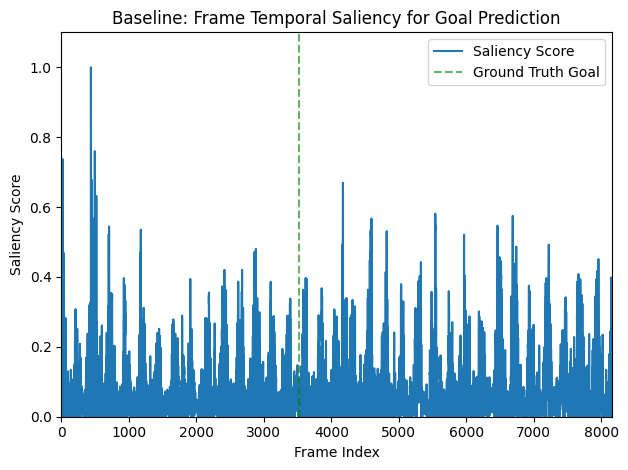

[Baseline] Most relevant frame index: 439


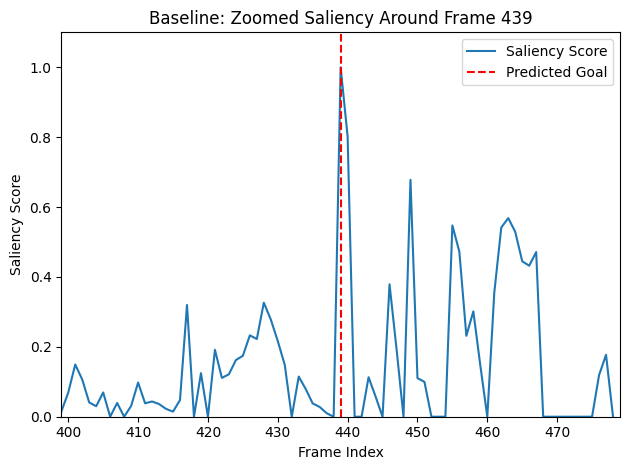

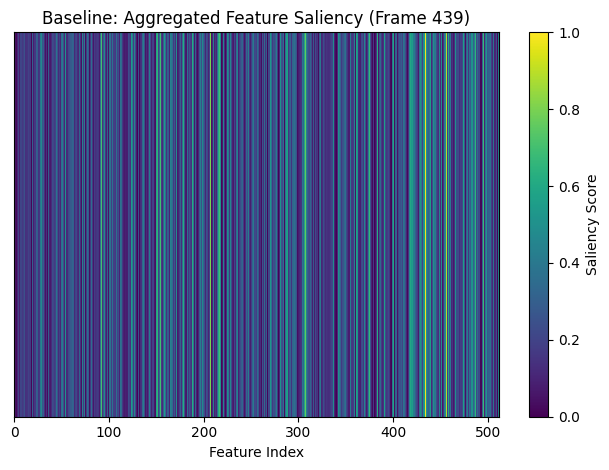

Processing SEB...


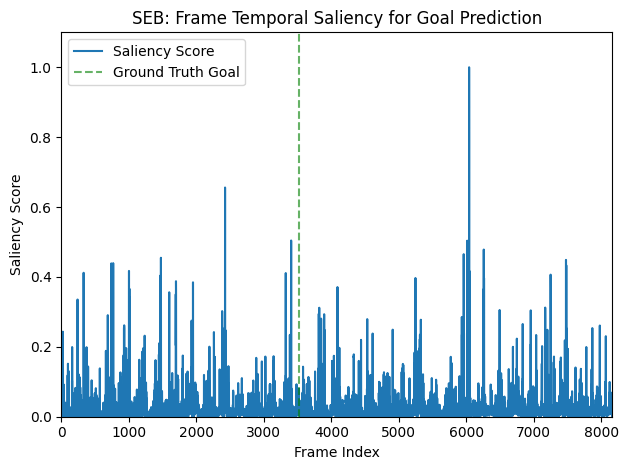

[SEB] Most relevant frame index: 6041


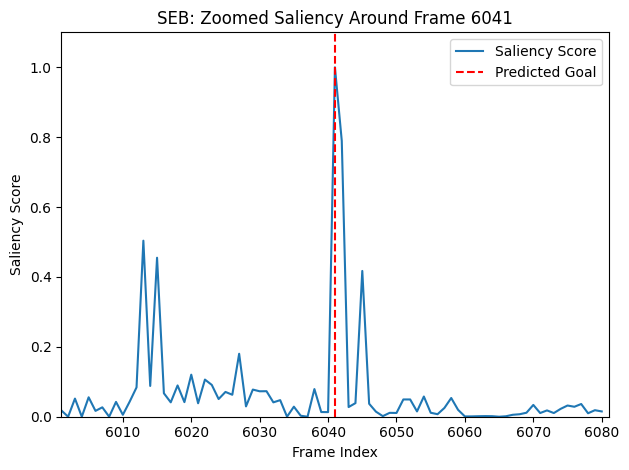

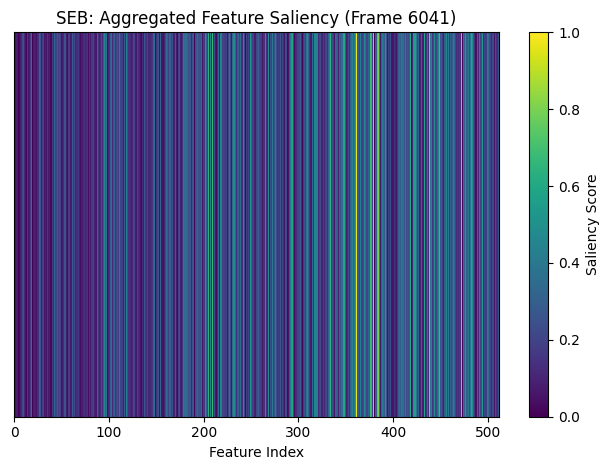

Processing Transformer Extractor...


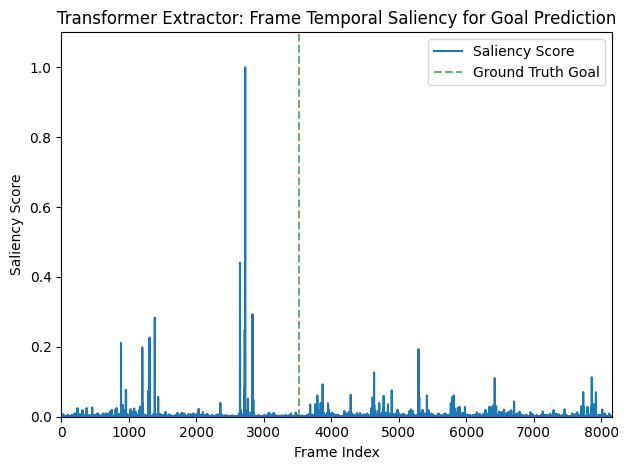

[Transformer Extractor] Most relevant frame index: 2724


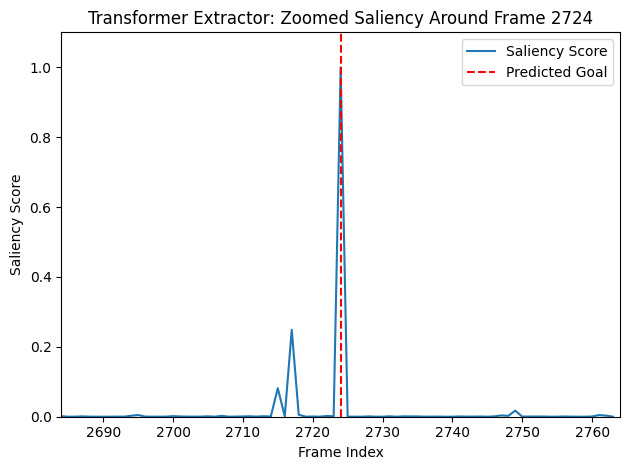

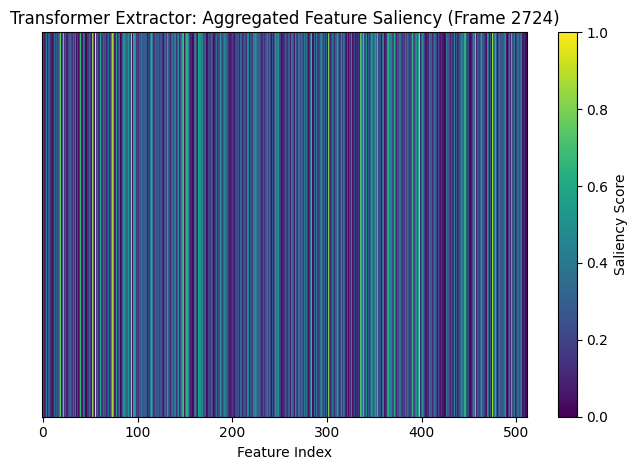

Processing Multi-head Attention Transformer...


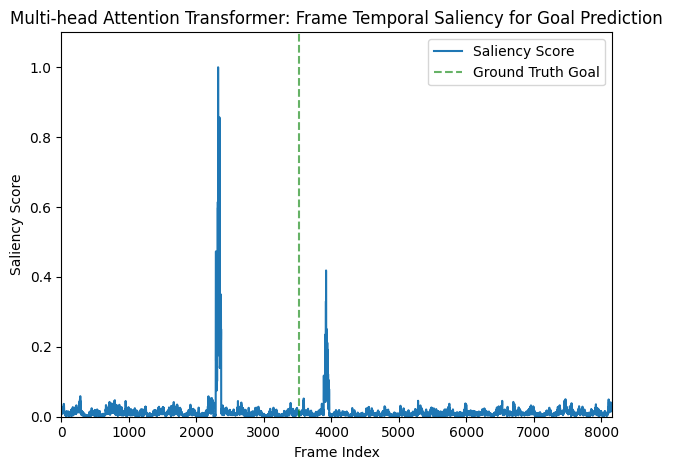

[Multi-head Attention Transformer] Most relevant frame index: 2323


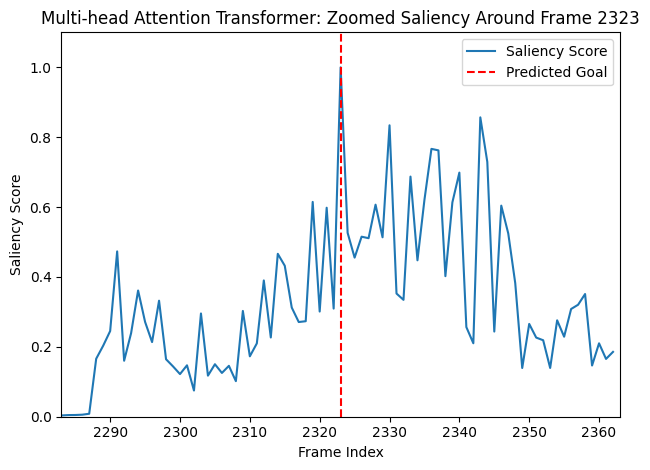

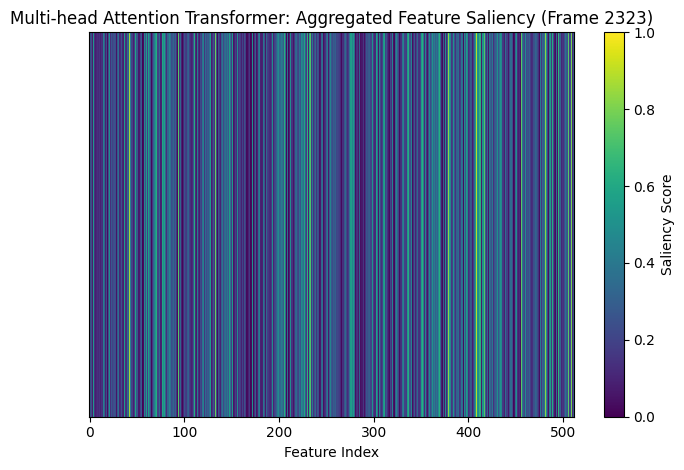

<ipython-input-58-7cbbf72b8e9f>:264: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", len(predictions))


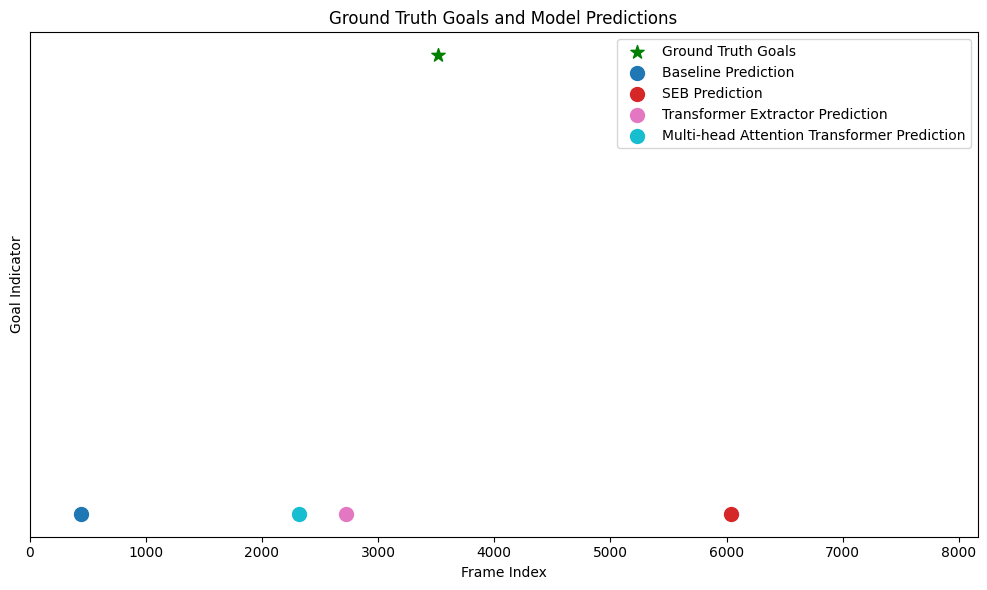

In [ ]:
# visualizations.py

import numpy as np
import torch
import torchvision.models as models
import matplotlib.pyplot as plt
from captum.attr import Saliency

# hyperparameters and paths
num_classes = 17
chunk_size = 240
input_size = 512
dim_capsule = 16
receptive_field = 80
num_detections = 15
framerate = 2
target_class = 2 # for "goal" event

# dictionary of models and their corresponding checkpoint paths
models_to_compare = {
    "Baseline": {
        "model": ContextAwareModel(
            input_size=input_size,
            num_classes=num_classes,
            chunk_size=chunk_size,
            dim_capsule=dim_capsule,
            receptive_field=receptive_field,
            num_detections=num_detections,
            framerate=framerate,
        ),
        "checkpoint": "/content/drive/MyDrive/files/soccernet/model.pth.tar",
    },
    "SEB": {
        "model": ContextAwareModelSeb(
            input_size=input_size,
            num_classes=num_classes,
            chunk_size=chunk_size,
            dim_capsule=dim_capsule,
            receptive_field=receptive_field,
            num_detections=num_detections,
            framerate=framerate,
        ),
        "checkpoint": "/content/drive/MyDrive/files/soccernet/squeeze/model.pth.tar",
    },
    "Transformer Extractor": {
        "model": ContextAwareModelTran(
            input_size=input_size,
            num_classes=num_classes,
            chunk_size=chunk_size,
            dim_capsule=dim_capsule,
            receptive_field=receptive_field,
            num_detections=num_detections,
            framerate=framerate,
        ),
        "checkpoint": "/content/drive/MyDrive/files/soccernet/transformer/model.pth.tar",
    },
    "Multi-head Attention Transformer": {
        "model": ContextAwareModelMHA(
            input_size=input_size,
            num_classes=num_classes,
            chunk_size=chunk_size,
            dim_capsule=dim_capsule,
            receptive_field=receptive_field,
            num_detections=num_detections,
            framerate=framerate,
        ),
        "checkpoint": "/content/drive/MyDrive/files/soccernet/multihead/model.pth.tar",
    },
}

# load dataset for evaluation
dataset = SoccerNetClipsTesting(
    path="/content/drive/MyDrive/files/soccernet",
    features="ResNET_PCA512.npy",
    framerate=framerate,
    chunk_size=chunk_size,
    receptive_field=receptive_field,
)
dataloader = torch.utils.data.DataLoader(
    dataset, batch_size=1, shuffle=False, num_workers=1, pin_memory=True
)

# get one batch of data for comparison
feat_half1, feat_half2, label_half1, label_half2 = next(iter(dataloader))
inputs = feat_half1.cuda().squeeze(0).unsqueeze(1)
inputs.requires_grad = True
print("inputs shape:", inputs.shape) # (chunks, 1, chunk_size, input_size)


# extract ground truth goal frames
def get_ground_truth_goal_frames(labels_half1, labels_half2, target_class):
    """
    Extracts the frame indices where goals occurred based on ground truth labels.
    """
    labels_half1 = labels_half1.squeeze().cpu().numpy() # shape: (frames,)
    labels_half2 = labels_half2.squeeze().cpu().numpy() # shape: (frames,)

    print("Unique labels in label_half1:", np.unique(label_half1))
    print("Unique labels in label_half2:", np.unique(label_half2))

    # extract frames where the target class has label value 1
    goal_frames_half1 = np.where(labels_half1[:, target_class] == 1)[0]
    goal_frames_half2 = np.where(labels_half2[:, target_class] == 1)[0]

    # adjust frame indices for the second half if necessary
    # for example, if half1 has n frames, add n to half2 frame indices
    total_frames_half1 = len(labels_half1)
    goal_frames_half2 += total_frames_half1

    # combine both halves
    ground_truth_goal_frames = np.concatenate([goal_frames_half1, goal_frames_half2])

    return ground_truth_goal_frames


ground_truth_goal_frames = get_ground_truth_goal_frames(
    label_half1, label_half2, target_class
)
print(f"Ground Truth Goal Frames: {ground_truth_goal_frames}")

# dictionary to store model predictions
model_predictions = {}


# function for computing saliency and collecting predictions for a given model
def compute_saliency_and_collect_predictions(
    model, checkpoint_path, model_name, predictions_dict
):
    # load model weights
    checkpoint = torch.load(checkpoint_path)
    model.load_state_dict(checkpoint["state_dict"])
    model.eval()
    model.cuda()

    # define forward wrapper for saliency
    def forward_wrapper(x):
        output_segmentation, _ = model(x)
        target_scores = output_segmentation[:, :, target_class]
        return target_scores.mean(dim=1)

    # compute saliency
    saliency = Saliency(forward_wrapper)
    attributions = saliency.attribute(inputs)
    saliency_map = (
        attributions.squeeze().cpu().detach().numpy()
    ) # (chunks, frames, features)

    # aggregate feature saliency over features
    temporal_saliency = saliency_map.mean(axis=-1) # (chunks, frames)
    temporal_saliency = temporal_saliency.reshape(-1) # flatten

    # normalize
    temporal_saliency = np.maximum(temporal_saliency, 0)
    temporal_saliency = (temporal_saliency - temporal_saliency.min()) / (
        temporal_saliency.max() - temporal_saliency.min()
    )

    # plot temporal saliency
    plt.plot(range(len(temporal_saliency)), temporal_saliency, label="Saliency Score")
    plt.title(f"{model_name}: Frame Temporal Saliency for Goal Prediction")
    plt.xlabel("Frame Index")
    plt.ylabel("Saliency Score")
    plt.xlim(0, len(temporal_saliency) - 1)
    plt.ylim(0, 1.1)

    # highlight ground truth goals
    for gt_frame in ground_truth_goal_frames:
        plt.axvline(
            x=gt_frame,
            color="green",
            linestyle="--",
            alpha=0.6,
            label=(
                "Ground Truth Goal" if gt_frame == ground_truth_goal_frames[0] else ""
            ),
        )

    plt.legend()
    plt.tight_layout()
    plt.show()

    # find most relevant frame
    goal_frame = np.argmax(temporal_saliency)
    print(f"[{model_name}] Most relevant frame index: {goal_frame}")

    # collect model prediction (e.g., frame with highest saliency)
    predictions_dict[model_name] = goal_frame

    # plot focus around most relevant frame
    start_idx = max(0, goal_frame - 40)
    end_idx = min(len(temporal_saliency), goal_frame + 40)
    plt.plot(
        range(start_idx, end_idx),
        temporal_saliency[start_idx:end_idx],
        label="Saliency Score",
    )
    plt.axvline(x=goal_frame, color="red", linestyle="--", label="Predicted Goal")
    plt.title(f"{model_name}: Zoomed Saliency Around Frame {goal_frame}")
    plt.xlabel("Frame Index")
    plt.ylabel("Saliency Score")
    plt.xlim(start_idx, end_idx)
    plt.ylim(0, 1.1)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # feature saliency computation
    batch_index = goal_frame // chunk_size
    frame_index = goal_frame % chunk_size
    target_input = (
        inputs[batch_index : batch_index + 1].detach().clone().requires_grad_(True)
    )
    frame_attributions = saliency.attribute(target_input)
    specific_frame_attributions = frame_attributions[
        :, :, frame_index : frame_index + 1, :
    ]
    feature_saliency_map = (
        specific_frame_attributions.mean(dim=2).squeeze(0).cpu().detach().numpy()
    )
    feature_saliency_map = feature_saliency_map.mean(axis=0)

    # normalize feature saliency
    feature_saliency_map = np.maximum(feature_saliency_map, 0)
    feature_saliency_map = (feature_saliency_map - feature_saliency_map.min()) / (
        feature_saliency_map.max() - feature_saliency_map.min()
    )

    # plot feature saliency
    plt.imshow(feature_saliency_map.reshape(1, -1), cmap="viridis", aspect="auto")
    plt.colorbar(label="Saliency Score") # add label to the colorbar for clarity
    plt.title(f"{model_name}: Aggregated Feature Saliency (Frame {goal_frame})")
    plt.xlabel("Feature Index")
    plt.yticks([]) # remove y-axis ticks
    plt.tight_layout()
    plt.show()


# loop through each model, compute saliency, and collect predictions
for model_name, model_info in models_to_compare.items():
    print(f"Processing {model_name}...")
    compute_saliency_and_collect_predictions(
        model_info["model"], model_info["checkpoint"], model_name, model_predictions
    )


# plot ground truth and all model predictions together
def plot_ground_truth_and_predictions(ground_truth, predictions, total_frames):
    plt.figure(figsize=(10, 6))
    plt.title("Ground Truth Goals and Model Predictions")
    plt.xlabel("Frame Index")
    plt.ylabel("Goal Indicator")

    # plot ground truth
    plt.scatter(
        ground_truth,
        [1.0] * len(ground_truth),
        color="green",
        marker="*",
        s=100,
        label="Ground Truth Goals",
    )

    # define a color map for different models
    colors = plt.cm.get_cmap("tab10", len(predictions))

    for idx, (model, pred_frame) in enumerate(predictions.items()):
        plt.scatter(
            pred_frame,
            0.8,
            color=colors(idx),
            marker="o",
            s=100,
            label=f"{model} Prediction",
        )

    plt.yticks([]) # hide y-axis ticks
    plt.xlim(0, total_frames)
    plt.legend(loc="upper right")
    plt.tight_layout()
    plt.show()


# determine total number of frames from inputs
total_chunks, _, chunk_size_, input_size_ = inputs.shape
total_frames = total_chunks * chunk_size_

# plot the combined ground truth and predictions
plot_ground_truth_and_predictions(
    ground_truth_goal_frames, model_predictions, total_frames
)
